In [2]:
import numpy as np 
import pandas as pd 
import geopandas as gpd 
import matplotlib.pyplot as plt 

%matplotlib inline

,t,arr,shelter,move,avg_fdist,neg_fdist,out_evac_zone_cnts,out_evac_buffer_cnts,shelter_tot
0,0,0,0,0,0,0,42,0,0
1,100,0,0,263,0,0,594,42,0
2,200,0,0,175,0,0,947,228,0
3,300,0,0,99,0,0,1243,475,0
4,400,0,0,74,0,0,1454,710,0


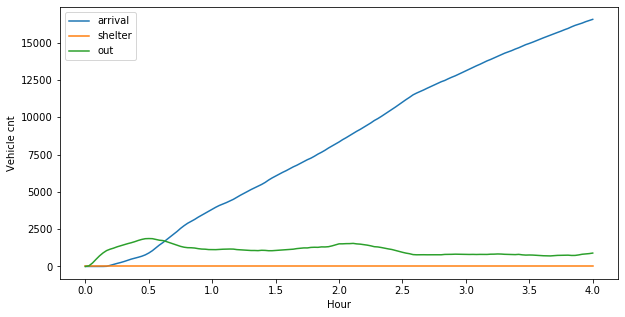

In [5]:
scen_nm = 'real_full'
t_stats = pd.read_csv('t_stats/t_stats_{}.csv'.format(scen_nm))
t_stats['shelter_tot'] = t_stats['shelter'].cumsum()
display(t_stats.head())

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(t_stats['t']/3600, t_stats['arr'], label='arrival')
ax.plot(t_stats['t']/3600, t_stats['shelter_tot'], label='shelter')
ax.plot(t_stats['t']/3600, t_stats['out_evac_buffer_cnts'], label='out')
plt.xlabel('Hour')
plt.ylabel('Vehicle cnt')
plt.legend()
plt.show()

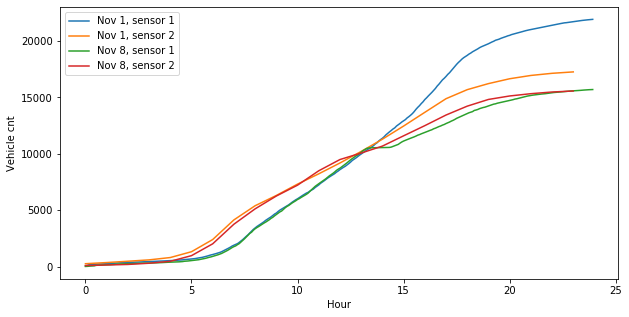

In [32]:
validation_0101 = pd.read_excel('../validation/paradise_11_01_01/pems_flow.xlsx')
validation_0101['time'] = validation_0101['5 Minutes'] - np.datetime64('2018-11-01T00:00:00')
validation_0101['time'] = validation_0101['time'].dt.total_seconds()

validation_0102 = pd.read_excel('../validation/paradise_11_01_02/pems_flow.xlsx')
validation_0102['time'] = validation_0102['Hour'] - np.datetime64('2018-11-01T00:00:00')
validation_0102['time'] = validation_0102['time'].dt.total_seconds()

validation_0801 = pd.read_excel('../validation/paradise_11_08_01/pems_flow.xlsx')
validation_0801['time'] = validation_0801['5 Minutes'] - np.datetime64('2018-11-08T00:00:00')
validation_0801['time'] = validation_0801['time'].dt.total_seconds()

validation_0802 = pd.read_excel('../validation/paradise_11_08_02/pems_flow.xlsx')
validation_0802['time'] = validation_0802['Hour'] - np.datetime64('2018-11-08T00:00:00')
validation_0802['time'] = validation_0802['time'].dt.total_seconds()
# display(validation_df.head())
# print(validation_df.shape)
# validation_df.dtypes

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(validation_0101['time']/3600, validation_0101['Flow (Veh/5 Minutes)'].cumsum(), label='Nov 1, sensor 1')
ax.plot(validation_0102['time']/3600, validation_0102['Flow (Veh/Hour)'].cumsum(), label='Nov 1, sensor 2')
ax.plot(validation_0801['time']/3600, validation_0801['Flow (Veh/5 Minutes)'].cumsum(), label='Nov 8, sensor 1')
ax.plot(validation_0802['time']/3600, validation_0802['Flow (Veh/Hour)'].cumsum(), label='Nov 8, sensor 2')
plt.xlabel('Hour')
plt.ylabel('Vehicle cnt')
plt.legend()
plt.show()

In [16]:
pd.read_excel('../validation/paradise_11_08_01/pems_flow.xlsx').head()

,5 Minutes,Lane 1 Flow (Veh/5 Minutes),Lane 2 Flow (Veh/5 Minutes),Flow (Veh/5 Minutes),# Lane Points,% Observed
0,2018-11-08 00:00:00,4,11,15,2,100
1,2018-11-08 00:05:00,1,6,7,2,100
2,2018-11-08 00:10:00,2,15,17,2,100
3,2018-11-08 00:15:00,4,8,12,2,100
4,2018-11-08 00:20:00,3,7,10,2,100


In [17]:
pd.read_excel('../validation/paradise_11_08_02/pems_flow.xlsx').head()

,Hour,Lane 1 Flow (Veh/Hour),Lane 2 Flow (Veh/Hour),Flow (Veh/Hour),# Lane Points,% Observed
0,2018-11-08 00:00:00,30,62,92,24,91.7
1,2018-11-08 01:00:00,18,34,52,24,100.0
2,2018-11-08 02:00:00,15,33,48,24,100.0
3,2018-11-08 03:00:00,36,72,108,24,100.0
4,2018-11-08 04:00:00,57,113,170,24,91.7


In [19]:
pd.read_excel('../validation/paradise_11_01_01/pems_flow_11_01.xlsx').head()

,5 Minutes,Lane 1 Flow (Veh/5 Minutes),Lane 2 Flow (Veh/5 Minutes),Flow (Veh/5 Minutes),# Lane Points,% Observed
0,2018-11-01 00:00:00,29,26,55,2,0
1,2018-11-01 00:05:00,30,27,57,2,0
2,2018-11-01 00:10:00,29,26,55,2,0
3,2018-11-01 00:15:00,8,11,19,2,100
4,2018-11-01 00:20:00,3,9,12,2,100


In [21]:
pd.read_excel('../validation/paradise_11_01_02/pems_flow2.xlsx').head()

,Hour,Lane 1 Flow (Veh/Hour),Lane 2 Flow (Veh/Hour),Flow (Veh/Hour),# Lane Points,% Observed
0,2018-11-01 00:00:00,110,148,258,24,75
1,2018-11-01 01:00:00,27,74,101,24,100
2,2018-11-01 02:00:00,37,81,118,24,100
3,2018-11-01 03:00:00,30,90,120,24,100
4,2018-11-01 04:00:00,78,129,207,24,100


In [10]:
import numpy as np
import pandas as pd 
from shapely.wkt import loads
from shapely.geometry import Point

In [28]:
links_df = pd.read_csv('../network_inputs/butte_edges_sim.csv')[['eid', 'geometry']]
# print(links_df.iloc[0])
links_gdf = gpd.GeoDataFrame(links_df, crs='epsg:4326', geometry=links_df['geometry'].map(loads)).to_crs('epsg:3857')

fire_df = pd.read_csv("../demand_inputs/simulation_fire_locations.csv")
fire_df['start_time'] = np.where(np.isnan(fire_df['start_time']), np.random.randint(0, 7200, fire_df.shape[0]), fire_df['start_time'])
fire_df['end_time'] = np.where(np.isnan(fire_df['end_time']), fire_df['start_time'], fire_df['end_time'])
fire_gdf = gpd.GeoDataFrame(fire_df, crs='epsg:4326', geometry=[Point(xy) for xy in zip(fire_df.lon, fire_df.lat)]).to_crs('epsg:3857')
display(fire_gdf.head())

,lat,lon,speed,initial_dist,type,start_time,end_time,geometry
0,39.758205,-121.599917,0,100,ember,826.0,826.0,POINT (-13536440.841 4830867.236)
1,39.756489,-121.592271,0,100,ember,3143.0,3143.0,POINT (-13535589.636 4830618.767)
2,39.778586,-121.576086,0,100,ember,1782.0,1782.0,POINT (-13533787.986 4833818.974)
3,39.786365,-121.588349,0,100,ember,6322.0,6322.0,POINT (-13535153.053 4834945.816)
4,39.773183,-121.573012,0,100,ember,2374.0,2374.0,POINT (-13533445.757 4833036.417)


In [27]:
links_sindex = links_gdf.sindex

offset = 100
bbox = fire_gdf.bounds + [-offset, -offset, offset, offset]
display(bbox.head())

hits = bbox.apply(lambda row: list(links_sindex.intersection(row)), axis=1)

tmp = pd.DataFrame({
    # index of points table
    "pt_idx": np.repeat(hits.index, hits.apply(len)),    # ordinal position of line - access via iloc later
    "line_i": np.concatenate(hits.values)
})
tmp.head()

,minx,miny,maxx,maxy
0,-1.353654e+07,4.830767e+06,-1.353634e+07,4.830967e+06
1,-1.353569e+07,4.830519e+06,-1.353549e+07,4.830719e+06
2,-1.353389e+07,4.833719e+06,-1.353369e+07,4.833919e+06
3,-1.353525e+07,4.834846e+06,-1.353505e+07,4.835046e+06
4,-1.353355e+07,4.832936e+06,-1.353335e+07,4.833136e+06


,pt_idx,line_i
0,1,26162.0
1,1,26163.0
2,1,2022.0
3,1,26164.0
4,1,5805.0


In [24]:
tmp = tmp.join(links_gdf.reset_index(drop=True), on="line_i")
tmp = tmp.join(fire_gdf.geometry.rename("point"), on="pt_idx")
tmp = gpd.GeoDataFrame(tmp, geometry="geometry", crs=fire_gdf.crs)
tmp.head()

,pt_idx,line_i,eid,geometry,point
0,1,26162.0,26162,"LINESTRING (-13535551.064 4830364.642, -135355...",POINT (-13535589.636 4830618.767)
1,1,26163.0,26163,"LINESTRING (-13535558.189 4830535.216, -135355...",POINT (-13535589.636 4830618.767)
2,1,2022.0,2022,"LINESTRING (-13535581.900 4830535.216, -135355...",POINT (-13535589.636 4830618.767)
3,1,26164.0,26164,"LINESTRING (-13535558.189 4830535.216, -135355...",POINT (-13535589.636 4830618.767)
4,1,5805.0,5805,"LINESTRING (-13535451.879 4830535.506, -135355...",POINT (-13535589.636 4830618.767)


In [25]:
tmp2 = tmp.copy()
tmp2["snap_dist"] = tmp2.geometry.distance(gpd.GeoSeries(tmp2.point))
tmp2.head()

,pt_idx,line_i,eid,geometry,point,snap_dist
0,1,26162.0,26162,"LINESTRING (-13535551.064 4830364.642, -135355...",POINT (-13535589.636 4830618.767),89.272892
1,1,26163.0,26163,"LINESTRING (-13535558.189 4830535.216, -135355...",POINT (-13535589.636 4830618.767),89.272892
2,1,2022.0,2022,"LINESTRING (-13535581.900 4830535.216, -135355...",POINT (-13535589.636 4830618.767),83.907953
3,1,26164.0,26164,"LINESTRING (-13535558.189 4830535.216, -135355...",POINT (-13535589.636 4830618.767),83.907953
4,1,5805.0,5805,"LINESTRING (-13535451.879 4830535.506, -135355...",POINT (-13535589.636 4830618.767),89.272892


In [26]:
tmp2[tmp2['eid']==24909]

,pt_idx,line_i,eid,geometry,point,snap_dist
92,18,24909.0,24909,"LINESTRING (-13533605.856 4826754.427, -135335...",POINT (-13533527.499 4826880.197),60.769923
104,19,24909.0,24909,"LINESTRING (-13533605.856 4826754.427, -135335...",POINT (-13533527.499 4826880.197),60.769923
